In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 


from statsmodels.stats.outliers_influence import variance_inflation_factor

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [2]:
from IPython.display import Image  

import random

In [3]:
plt.rcParams['figure.figsize'] = [15,8]

In [5]:
df=pd.read_csv('bank.csv')

In [8]:
df.head()
df.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<Axes: >

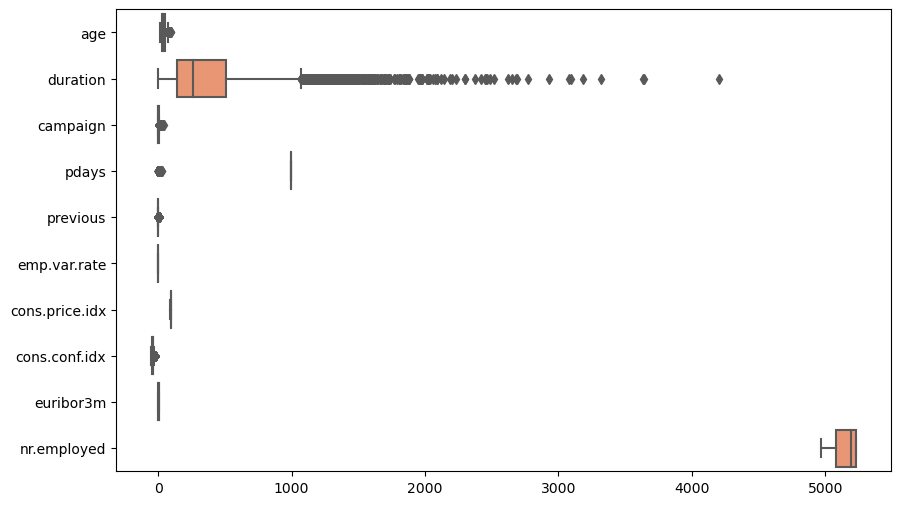

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,orient='h',palette='Set2')

In [25]:
df1=df.copy()
df1.shape

(9640, 11)

In [23]:
def remove_outliers(df):
    df_clean = df.copy()
    q1 = df_clean.quantile(0.25)
    q3 = df_clean.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    
    df_clean = df_clean[~((df_clean < lower_bound) | (df_clean > upper_bound)).any(axis=1)]
    
    return df_clean

In [38]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns

[]